# Plot creation notebook

This notebook will be utilized to create plots from the Tensorboard ouputs.
For instance, an interesting plot would be the average mean episodic reward and its standard deviation across different seeds for the different experiments.

In [58]:
from matplotlib import pyplot as plt
import seaborn as sns
import tensorboard as tb
import pandas as pd
import numpy as np

## Utility Functions

goal_output should look like:

step | seed_1 | seed_2 | seed_3 | ... 
--- | --- | --- | --- | --- | 
... | ... | ... | ... | ... | 
500k |

In [112]:
def get_experiment_df(
    exp_id : str,
    tag_value: str = "rollout/ep_rew_mean",
) -> pd.DataFrame:
    # get experiment from tensorboard.dev
    exp = tb.data.experimental.ExperimentFromDev(exp_id)
    df = exp.get_scalars()

    # transform the relevant data in another format
    start = df['step'][0]
    stop = df['step'].iloc[-1] + 1
    step = df['step'][1] - df['step'][0]
    d = {
        run_name : df[(df['run'] == run_name) & (df['tag'] == tag_value)]['value'].values \
            for run_name in df['run'].unique()
    }
    d = {
        'step' : np.arange(start=start, stop=stop, step=step),
        **d
    }

    return pd.DataFrame(d).set_index('step')

def create_avg_std_plot(
    df: pd.DataFrame,
    std_ddof: int = 0,
    legend: bool = True,
    save_path : str = None,
    **style_kwargs
):
    x = df.index.to_numpy()
    means = df.mean(axis=1).values
    stds = df.std(axis=1, ddof=std_ddof).values

    sns.set_theme()
    plt.plot(x, means, 'b-', label="avg_reward")
    plt.fill_between(x, means -  stds, means + stds, color="r", alpha=0.2)
    if legend:
        plt.legend(loc='upper left')
    
    if save_path is not None:
        plt.savefig(save_path + ".pdf", format="pdf")
    
    plt.show()

In [89]:
# test:
df = get_experiment_df('cJPfkPJPTyiKqPXWieTAzw')

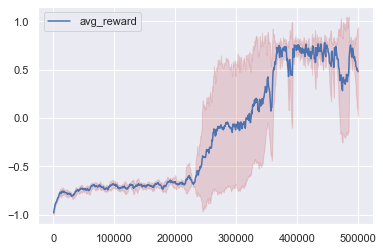

In [115]:
create_avg_std_plot(df, save_path="figures/a2c_success")